# Assignment Instructions:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) or you can also run the below cell and load the data directly.
2. Perform a similar anlaysis as done in the reference notebook on this dataset.


In [ ]:
import pandas as pd
import scipy as sp
import seaborn as sns
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# we can read the data directly from raw github link
# we are also defining the name of the columns.
#make sure that your csv file and ipynb notebook are in the same folder. If they are in different folder then you have to define the complete path
haberman=pd.read_csv('haberman.csv',skiprows=[0],names=["age","operation_Year","axil_nodes","survival_status"])
haberman.head()

,age,operation_Year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
- You have to write all of your observations in Markdown cell with proper formatting.You can go through the following blog to understand formatting in markdown cells - https://www.markdownguide.org/basic-syntax/
- Do not write your observations as comments in code cells.
- Write comments in your code cells in order to explain the code that you are writing. Proper use of commenting can make code maintenance much easier, as well as helping make finding bugs faster.
- You can add extra cells using <b>Insert cell below command</b> in Insert tab. You can also use the shortcut Alt+Enter
- It is a good programming practise to define all the libraries that you would be using in a single cell

In [ ]:
print (haberman.shape)
print(haberman.columns)

(306, 4)
Index(['age', 'operation_Year', 'axil_nodes', 'survival_status'], dtype='object')


In [ ]:
haberman["survival_status"].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

In [ ]:
haberman.describe()

,age,operation_Year,axil_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [ ]:
print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              306 non-null    int64
 1   operation_Year   306 non-null    int64
 2   axil_nodes       306 non-null    int64
 3   survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


In [ ]:
max(haberman['axil_nodes'])

52

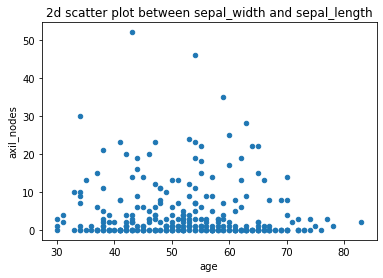

In [ ]:
haberman.plot(kind='scatter', x='age', y='axil_nodes') ;
plt.title('2d scatter plot between sepal_width and sepal_length')
plt.show()

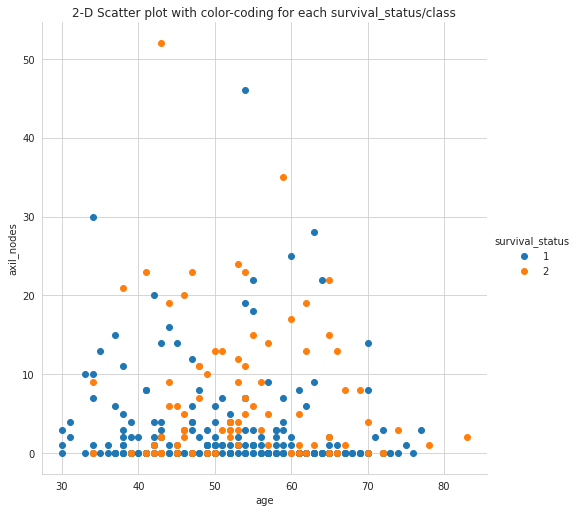

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival_status", size=7) \
   .map(plt.scatter, "age", "axil_nodes") \
   .add_legend();
plt.title('2-D Scatter plot with color-coding for each survival_status/class')
plt.show();

### 1.2 - Explain the objective of the problem.
(The objective for a problem can be defined as a brief explanation of problem that you are trying to solve using the given dataset)

In [ ]:
less_than_5_years = haberman.loc[haberman["survival_status"] == 1];
more_than_5_years = haberman.loc[haberman["survival_status"] == 2];

In [ ]:
less_than_5_years

,age,operation_Year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
298,73,68,0,1
300,74,63,0,1
301,75,62,1,1
302,76,67,0,1


### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable.
- Do write observations/inference for each plot.

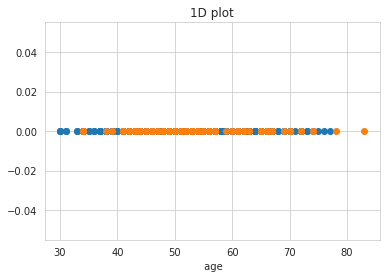

In [ ]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
less_than_5_years = haberman.loc[haberman["survival_status"] == 1];
more_than_5_years = haberman.loc[haberman["survival_status"] == 2];
#print(iris_setosa["petal_length"])
plt.plot(less_than_5_years["age"], np.zeros_like(less_than_5_years['age']), 'o')
plt.plot(more_than_5_years["age"], np.zeros_like(more_than_5_years['age']), 'o')
plt.title('1D plot')
plt.xlabel(' age')
plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

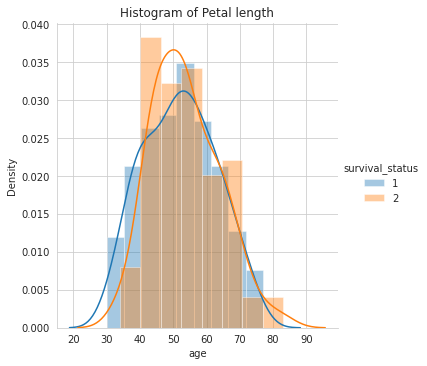

In [ ]:

sns.FacetGrid(haberman, hue="survival_status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('Histogram of Petal length')
plt.show();

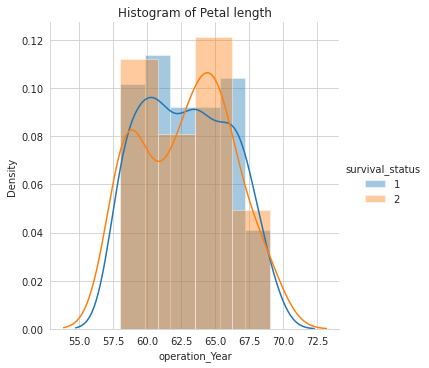

In [ ]:
sns.FacetGrid(haberman, hue="survival_status", size=5) \
   .map(sns.distplot, "operation_Year") \
   .add_legend();
plt.title('Histogram of Petal length')
plt.show();

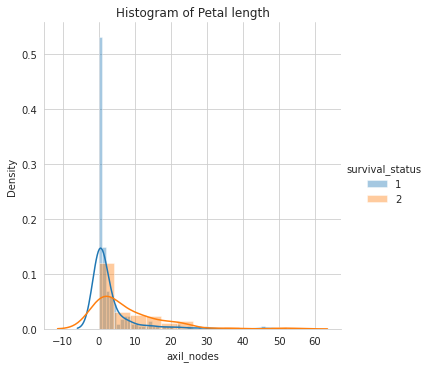

In [ ]:
sns.FacetGrid(haberman, hue="survival_status", size=5) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
plt.title('Histogram of Petal length')
plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


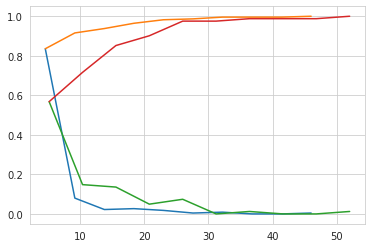

In [ ]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(less_than_5_years['axil_nodes'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(more_than_5_years['axil_nodes'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


#counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, density = True)
#pdf = counts/(sum(counts))
#plt.plot(bin_edges[1:],pdf);

plt.show();

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


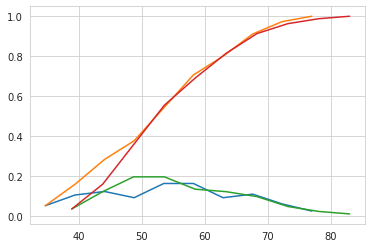

In [ ]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(less_than_5_years['age'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(more_than_5_years['age'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


#counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, density = True)
#pdf = counts/(sum(counts))
#plt.plot(bin_edges[1:],pdf);

plt.show();

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


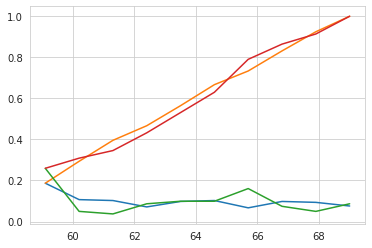

In [ ]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(less_than_5_years['operation_Year'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(more_than_5_years['operation_Year'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


#counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, density = True)
#pdf = counts/(sum(counts))
#plt.plot(bin_edges[1:],pdf);

plt.show();

### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable.
- Do write observations/inference for each  plot.


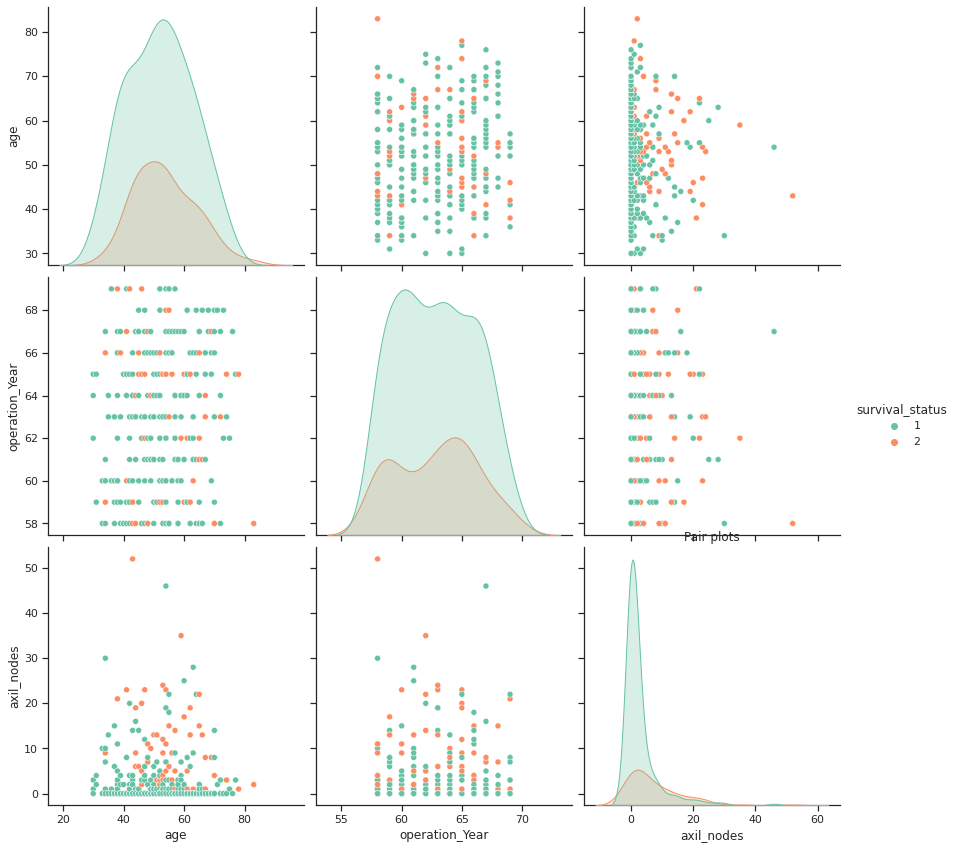

In [ ]:
plt.close();
sns.set_style("whitegrid");
sns.set(style="ticks", color_codes=True)
sns.pairplot(haberman, hue="survival_status", size=4,palette="Set2");
plt.title('Pair plots')
plt.show()

### 1.5 Summarize your final conclusions of the Exploration
- You can desrcibe the key features that are important for the Classification task.
- Try to quantify your results i.e. while writing observations include numbers,percentages, fractions etc.
- Write a brief of your exploratory analysis in 3-5 points
- Write your observations in english as crisply and unambigously as possible.

#qqplot

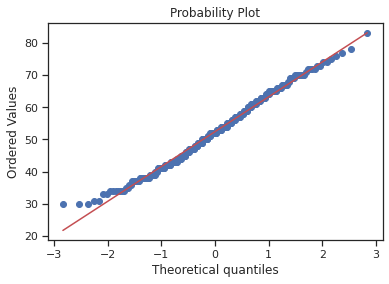

In [ ]:
import matplotlib.pylab as p
sp.stats.probplot(haberman['age'],dist='norm',plot=p)
p.show()